# **SITUATION**





 Company A sells fashion. They have stores in each country’s capital: UK (London); FR (Paris); IT (Milan); GER (Berlin). Their customers either buy online or in the store itself. At the same time, it maintains a website of individual product pages with write ups and images about the page. In some cases, the page might have gone up after the product was put up for sale. Management would like you – the data analyst – to use of this data and answer these questions:
* What is the impact of our website traffic on revenue?
* Which products get us pageviews and revenue?
* What customer segments are there?


In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta,date
import datetime as dt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data and Prepare Data

In [2]:
#
path = "/content/drive/MyDrive/未命名資料夾/Traffic"
excel_files = glob.glob(os.path.join(path, "*.xlsx"))
files = []
result = pd.DataFrame()

for f in excel_files:
    df = pd.read_excel(f)
    files.append(df)
    print(f)
    #result = pd.concat([result,df])
    #print(result)
df = pd.concat(files,axis=0)

/content/drive/MyDrive/未命名資料夾/Traffic/2020_06.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_05.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_10.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_02.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_04.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_09.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_11.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_01.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_08.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_03.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_07.xlsx
/content/drive/MyDrive/未命名資料夾/Traffic/2020_12.xlsx


In [3]:
df1 = df2 = df3 = pd.DataFrame()
dic = {
    "customer info": df1,
    "Items":df2,
    "Customer transactions":df3
}

for name,dataframe in dic.items():
  xlsx =pd.ExcelFile("/content/drive/MyDrive/未命名資料夾/customers (UK).xlsx")
  dic[name] = pd.read_excel(xlsx, sheet_name=name)
  print(f"Sheet {name} load into dictionary")

Sheet customer info load into dictionary
Sheet Items load into dictionary
Sheet Customer transactions load into dictionary


In [4]:
df1 = dic["customer info"]
df2 = dic["Items"]
df3 = dic["Customer transactions"]

In [5]:
df_customer = df1.merge(df3,left_on="ID",right_on="CustomerID")
df_all = df2.merge(df_customer,left_on="ItemID",right_on="ItemID")
print(df_all.shape)
df_all.head()

(25213, 17)


,ItemID,Product,Brand,SellPrice,CostPrice,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,OrderID,CustomerID,TransactionDate,Channel
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359,660,Vince0.78241795130866,Goh0.375737577987716,GER - Germany,2016-09-15,NaN,1980-01-23,Y,7193,660,2020-03-09,In Store
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207,666,Tony0.845999884966401,Yeo0.611885815700127,GER - Germany,2016-09-15,F,1976-07-14,Y,7256,666,2020-03-10,Online
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199,473,Ni0.603754535921879,Tjong0.525521495498275,UK - United Kingdom,2016-08-10,NaN,1990-01-21,N,5124,473,2020-01-09,In Store
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262,353,Le0.662009716234969,Ch0.546519502591008,IT - Italy,2016-06-10,F,1977-05-29,Y,3885,353,2020-03-06,In Store
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392,333,E0.841179220247542,E0.981249881505118,UK - United Kingdom,2016-06-08,F,2009-01-20,Y,3668,333,2020-07-08,In Store


In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25213 entries, 0 to 25212
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ItemID           25213 non-null  int64         
 1   Product          25213 non-null  object        
 2   Brand            25213 non-null  object        
 3   SellPrice        25213 non-null  int64         
 4   CostPrice        25213 non-null  int64         
 5   ID               25213 non-null  int64         
 6   FirstName        25213 non-null  object        
 7   LastName         25213 non-null  object        
 8   Country          25213 non-null  object        
 9   DateJoined       25213 non-null  datetime64[ns]
 10  Gender           16892 non-null  object        
 11  Birthday         25213 non-null  datetime64[ns]
 12  Newsletter       25213 non-null  object        
 13  OrderID          25213 non-null  int64         
 14  CustomerID       25213 non-null  int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17889 entries, 0 to 465
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  float64       
 2   uniquePageviews         17889 non-null  float64       
 3   pageviews               17889 non-null  float64       
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 978.3+ KB


In [8]:
df["Date"] = pd.to_datetime(df["Posted On (DD/MM/YYYY)"]).dt.date
df["Date"] = pd.to_datetime(df["Date"])
df_all["TransactionDate"] = pd.to_datetime(df_all["TransactionDate"]).dt.date
df_all["TransactionDate"] = pd.to_datetime(df_all["TransactionDate"])

| Source | Description |
| ----------- | ----------- |
| Customers & Transactions| Customer info and their transactions. These transactions are a mix of in-store and online transactions. |
| Traffic | Website traffic data for individual product pages (Duration: Jan to Dec 2020) |

# 1. **WHAT IS THE IMPACT OF OUR WEBSITE TRAFFIC ON REVENUE**

**Conversion Rate**: A conversion rate records the percentage of users who have completed a desired action. Conversion rates are calculated by taking the total number of users who ‘convert’ (for example, by clicking on an advertisement), dividing it by the overall size of the audience and converting that figure into a percentage.

Since we want to know the impact of our website traffic on revenue. I will take the number of transactions have been made divide with the total Users traffic (people actively search for our product)

In [9]:
#Select only the Online channel
df_transaction_online = df_all[df_all["Channel"] == "Online"]

In [10]:
#Group all the metrics and features by Date
df_traffic_total = pd.DataFrame(df.groupby("Date")["users"].sum())
df_customer_transactions_channel_count = pd.DataFrame(df_transaction_online.groupby(["TransactionDate"])["Channel"].count())
df_customer_transactions_sell = pd.DataFrame(df_transaction_online.groupby(["TransactionDate"])["SellPrice"].sum())

In [11]:
df_transactions = (
    df_customer_transactions_channel_count.merge(
      df_customer_transactions_sell,
      left_index=True,
      right_index=True)
    .rename({"Channel":"Transaction_Counts"},axis=1)
    .reset_index()
    .rename({"TransactionDate":"Date"},axis=1)
)

In [12]:
df_traffic_total= df_traffic_total.reset_index()

In [13]:
#Join all the metrics and feature grouped by Date using outer join to keep all the values
df_transactions_traffic = df_transactions.merge(df_traffic_total,how="outer",left_on="Date",right_on="Date")

In [14]:
df_transactions_traffic

,Date,Transaction_Counts,SellPrice,users
0,2020-01-01,36.0,32044.0,63755.4
1,2020-01-02,40.0,31612.0,111861.4
2,2020-01-03,36.0,30635.0,63749.8
3,2020-01-04,29.0,24627.0,13946.0
4,2020-01-05,37.0,29254.0,47065.0
...,...,...,...,...
357,2020-10-30,NaN,NaN,73638.8
358,2020-10-31,NaN,NaN,24006.4
359,2020-11-28,NaN,NaN,22268.2
360,2020-11-29,NaN,NaN,31172.0


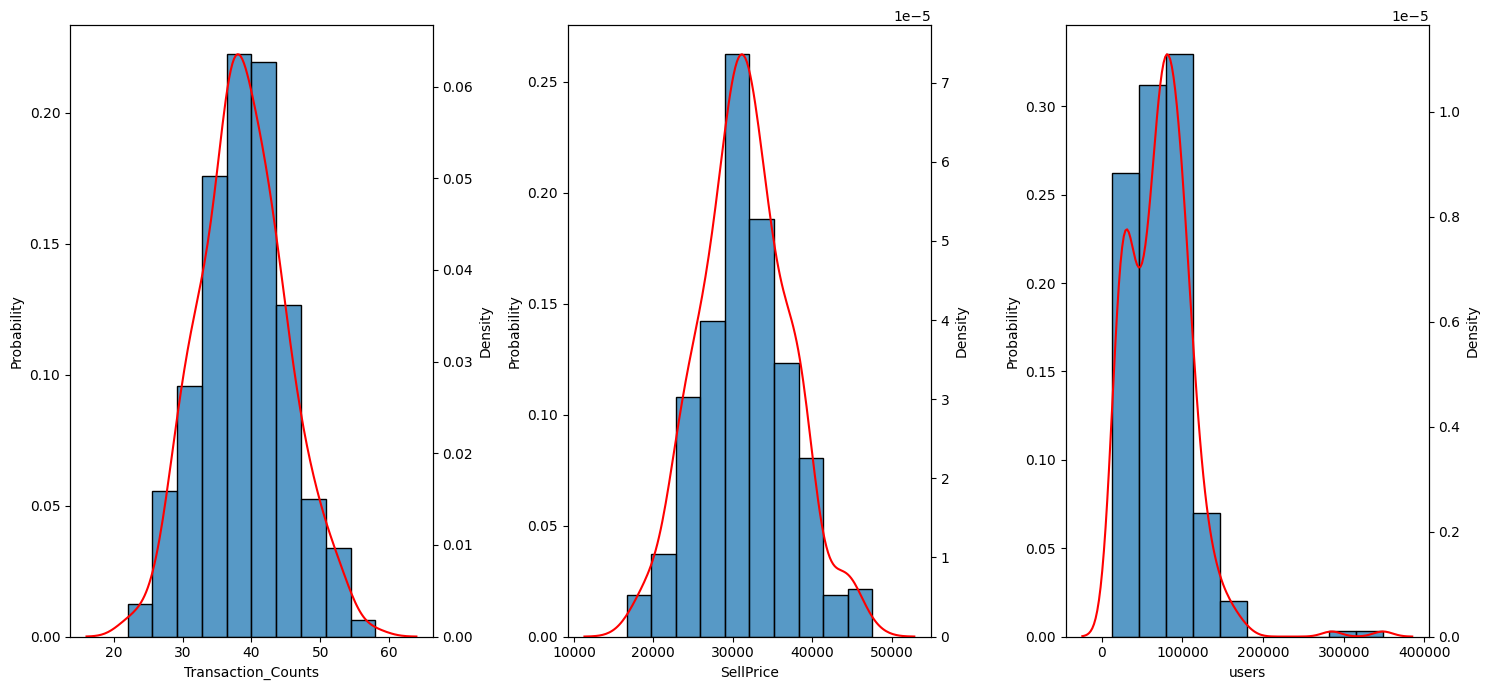

In [15]:
#See the distribution for each colum to find appropriate method to fill NAN value
metrics = ["Transaction_Counts","SellPrice","users"]
fig, axs = plt.subplots(ncols=len(metrics), figsize=(15,7))
axs = axs.flatten()
idx = 0
for v in metrics:
  sns.histplot(data=df_transactions_traffic[v], ax=axs[idx], stat="probability", bins=10)
  sns.kdeplot(data=df_transactions_traffic[v], ax=axs[idx].twinx(), color="red")
  idx += 1
plt.tight_layout()

In [16]:
#Transaction counts and Sell price columns are evenly distributed so the best method to fill NAN value is to fill mean
df_transactions_traffic['Transaction_Counts'].fillna(
    value = int(df_transactions_traffic['Transaction_Counts'].mean()),
    axis=0,
    inplace=True
)
df_transactions_traffic["SellPrice"].fillna(
    value = df_transactions_traffic["SellPrice"].mean(),
    axis=0,
    inplace=True
)

In [17]:
#The other column is right skewed so I suggest filling NAN with median
mode_columns = ["users"]
for x in mode_columns:
  df_transactions_traffic[x].fillna(
      value = df_transactions_traffic[x].median(),
      axis=0,
      inplace=True
  )
  print(f"{x} filled with mode values")

users filled with mode values


In [18]:
#Finally we calculated conversion rate to see how our website impact our revenue
df_transactions_traffic["ConversionRate"] = round(
    (df_transactions_traffic["Transaction_Counts"] / df_transactions_traffic["users"]) * 100,2
)


In [19]:
df_transactions_traffic

,Date,Transaction_Counts,SellPrice,users,ConversionRate
0,2020-01-01,36.0,32044.000000,63755.4,0.06
1,2020-01-02,40.0,31612.000000,111861.4,0.04
2,2020-01-03,36.0,30635.000000,63749.8,0.06
3,2020-01-04,29.0,24627.000000,13946.0,0.21
4,2020-01-05,37.0,29254.000000,47065.0,0.08
...,...,...,...,...,...
357,2020-10-30,38.0,31465.910494,73638.8,0.05
358,2020-10-31,38.0,31465.910494,24006.4,0.16
359,2020-11-28,38.0,31465.910494,22268.2,0.17
360,2020-11-29,38.0,31465.910494,31172.0,0.12


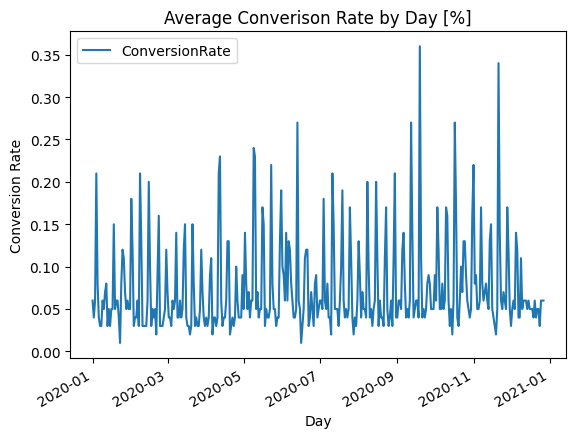

In [29]:
df_transactions_traffic.plot( x = 'Date' , y = 'ConversionRate')

plt.xlabel("Day")
plt.ylabel("Conversion Rate")
plt.title("Average Converison Rate by Day [%]");

* Conversion Rate with the highest being 0.35 around September and the lowest in February just above 0.001 by day

In [23]:
df_transactions_traffic['Month-Year'] = df_transactions_traffic['Date'].dt.to_period('M')

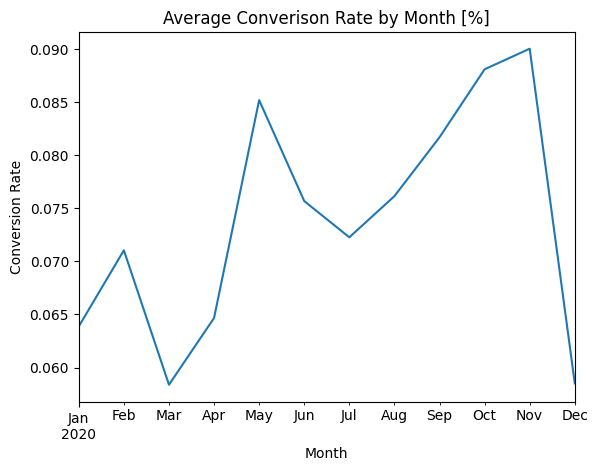

In [27]:
df_transactions_traffic.groupby("Month-Year")["ConversionRate"].mean().plot.line()

plt.xlabel("Month")
plt.ylabel("Conversion Rate")
plt.title("Average Converison Rate by Month [%]");

* Conversion Rates by Months are unstable, they hit rock bottom in March and December, but peaked in November

Conversion rate gives us an overview of how much percentage of online users actually became our customers. From that give us a better view of the impact of online traffic affect our revenue

**Conclusion:** From what the conversion rate imply, our online traffic seem to have only a little impact on our online revenue



# 2. **Which products get us pageviews and revenue?**

In [ ]:
df_all.head()

,ItemID,Product,Brand,SellPrice,CostPrice,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,OrderID,CustomerID,TransactionDate,Channel
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359,660,Vince0.78241795130866,Goh0.375737577987716,GER - Germany,2016-09-15,NaN,1980-01-23,Y,7193,660,2020-03-09,In Store
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207,666,Tony0.845999884966401,Yeo0.611885815700127,GER - Germany,2016-09-15,F,1976-07-14,Y,7256,666,2020-03-10,Online
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199,473,Ni0.603754535921879,Tjong0.525521495498275,UK - United Kingdom,2016-08-10,NaN,1990-01-21,N,5124,473,2020-01-09,In Store
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262,353,Le0.662009716234969,Ch0.546519502591008,IT - Italy,2016-06-10,F,1977-05-29,Y,3885,353,2020-03-06,In Store
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392,333,E0.841179220247542,E0.981249881505118,UK - United Kingdom,2016-06-08,F,2009-01-20,Y,3668,333,2020-07-08,In Store


In [ ]:
#Since the question is what products have highest pageview and revenue
#I use inner join to only extract the product that share both values
df_products_view_rev = df_all.merge(df,left_on="Brand",right_on="Brand")

                             SellPrice   pageviews
Product                                           
g-dX-look0.897569041695992     7891430  17586966.0
nikzswear0.156690506174201     7626120  17586966.0
nikf-info0.0504871333447614    7033800  17586966.0
niky-info0.291457801989401     6856104  14069572.8
nikw-gold0.879607833563163     6708024  14069572.8


<Axes: xlabel='Product'>

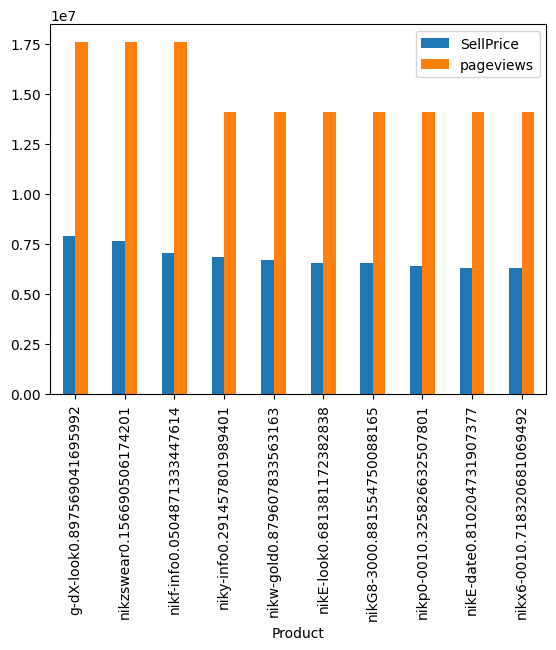

In [ ]:
df_products_view_rev_sum = (
    df_products_view_rev.groupby("Product")[["SellPrice","pageviews"]].sum()
    .sort_values(by="SellPrice",ascending=False)
    .head(10)
)
print(df_products_view_rev_sum.head())
df_products_view_rev_sum.plot.bar()

# 3.**What customer segments are there?**

There are various ways to perform customer segmentation. But with this kind of data, I think the most suitable approach is using RFM segmentation.

**RFM model** is a proven marketing strategy based on customer behavior segmentation. It groups customers based on their purchase history – how recently, with what Frequency, and what value they bought.

RFM Metrics

* Recency : It is the amount of time since the customers most recent transaction. It is measured in days.

* Frequency: Total number of transactions made by the customer.

* Monetary : Total amount the customer has spent across all transactions.

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25213 entries, 0 to 25212
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ItemID           25213 non-null  int64         
 1   Product          25213 non-null  object        
 2   Brand            25213 non-null  object        
 3   SellPrice        25213 non-null  int64         
 4   CostPrice        25213 non-null  int64         
 5   ID               25213 non-null  int64         
 6   FirstName        25213 non-null  object        
 7   LastName         25213 non-null  object        
 8   Country          25213 non-null  object        
 9   DateJoined       25213 non-null  datetime64[ns]
 10  Gender           16892 non-null  object        
 11  Birthday         25213 non-null  datetime64[ns]
 12  Newsletter       25213 non-null  object        
 13  OrderID          25213 non-null  int64         
 14  CustomerID       25213 non-null  int64

In [ ]:
df_all.drop(columns="Gender",inplace=True)

In [ ]:
#I will perform RFM analysis on the customers on the country which the most customers are form which are Germany
#This only to demonstrate how the RFM analysis works
df_all["Country"].value_counts()

GER - Germany          10623
FR - France             8280
IT - Italy              4049
UK - United Kingdom     2261
Name: Country, dtype: int64

In [ ]:
df_all['TransactionYearMonth'] = df_all['TransactionDate'].apply(lambda x: 100*x.year + x.month)

## RFM Analysis

In [ ]:
df_all_Ger= df_all[df_all["Country"]=="GER - Germany"]

In [ ]:
df_all_Ger

,ItemID,Product,Brand,SellPrice,CostPrice,ID,FirstName,LastName,Country,DateJoined,Birthday,Newsletter,OrderID,CustomerID,TransactionDate,Channel,TransactionYearMonth
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359,660,Vince0.78241795130866,Goh0.375737577987716,GER - Germany,2016-09-15,1980-01-23,Y,7193,660,2020-03-09,In Store,202003
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207,666,Tony0.845999884966401,Yeo0.611885815700127,GER - Germany,2016-09-15,1976-07-14,Y,7256,666,2020-03-10,Online,202003
5,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392,716,Yew0.250320656872678,Lin0.518924606167321,GER - Germany,2016-09-05,1985-02-19,N,7788,716,2020-04-25,Online,202004
8,8,101s-info0.671227295694652,"LN=p+iC[&z'G,t&/",524,406,109,J0.855646496424537,W0.775201627445077,GER - Germany,2016-03-22,1988-07-10,Y,1183,109,2020-10-15,Online,202010
12,12,101W-info0.814078992987125,"LN=p+iC[&z'G,t&/",1387,168,57,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,1966-01-14,N,643,57,2020-09-08,Online,202009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25196,17877,yoko-date0.0211318764636008,"Gu3iD<H.,OIEQ@s\",1324,213,106,Xing0.325721670148887,Ong0.332374624629349,GER - Germany,2016-03-21,1993-06-02,Y,1146,106,2020-01-06,In Store,202001
25200,17881,youh-song0.697646999759109,Sn%_x007f_aICLsmUf>YY$,637,103,693,S0.388701355058947,Ch0.087066098740417,GER - Germany,2015-05-25,1966-04-06,Y,7544,693,2020-03-20,In Store,202003
25204,17886,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463,131,190,Hui0.955352532475053,J0.496770063638712,GER - Germany,2016-05-20,1999-07-25,Y,2119,190,2020-01-23,Online,202001
25207,17887,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688,200,596,Sur0.256251387338921,x0.868064831622167,GER - Germany,2016-09-05,1988-10-19,Y,6527,596,2020-02-17,Online,202002


In [ ]:
df_customer = pd.DataFrame(df_all_Ger["CustomerID"].unique())
df_customer.columns = ["CustomerID"]
df_customer.head()

,CustomerID
0,660
1,666
2,716
3,109
4,57


In [ ]:
df_customer_recency = pd.DataFrame(df_all_Ger.groupby("CustomerID")["TransactionDate"].max().reset_index())
df_customer_recency.columns = ["CustomerID","Last_day_purchase"]
df_customer_recency.head()

,CustomerID,Last_day_purchase
0,1,2020-12-15
1,5,2020-12-22
2,6,2020-12-25
3,7,2020-12-02
4,10,2020-12-17


In [ ]:
df_customer_recency["Recency"] =  (df_customer_recency["Last_day_purchase"].max() -
                                  df_customer_recency["Last_day_purchase"]).dt.days
df_customer_recency.head()

,CustomerID,Last_day_purchase,Recency
0,1,2020-12-15,12
1,5,2020-12-22,5
2,6,2020-12-25,2
3,7,2020-12-02,25
4,10,2020-12-17,10


In [ ]:
df_customer = pd.merge(df_customer, df_customer_recency[["CustomerID","Recency"]], on = "CustomerID")
df_customer.head()

,CustomerID,Recency
0,660,14
1,666,2
2,716,6
3,109,4
4,57,12


In [ ]:
X_r = df_customer[["Recency"]]
n_clusters = range(2,13)
r_inertia_errors = []
r_silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model= KMeans(n_clusters=k,random_state=42)
    #train model
    model.fit(X_r)
    #Calculate inertia
    r_inertia_errors.append(model.inertia_)
    #Calculate silhouettte score
    r_silhouette_scores.append(
        silhouette_score(X_r,model.labels_)
    )

print("Inertia:", r_inertia_errors[:3])
print()
print("Silhouette Scores:", r_silhouette_scores[:3])

Inertia: [94106.95571847507, 55364.59734402404, 26085.574]

Silhouette Scores: [0.876162715374938, 0.8507331546597386, 0.6738825496433081]


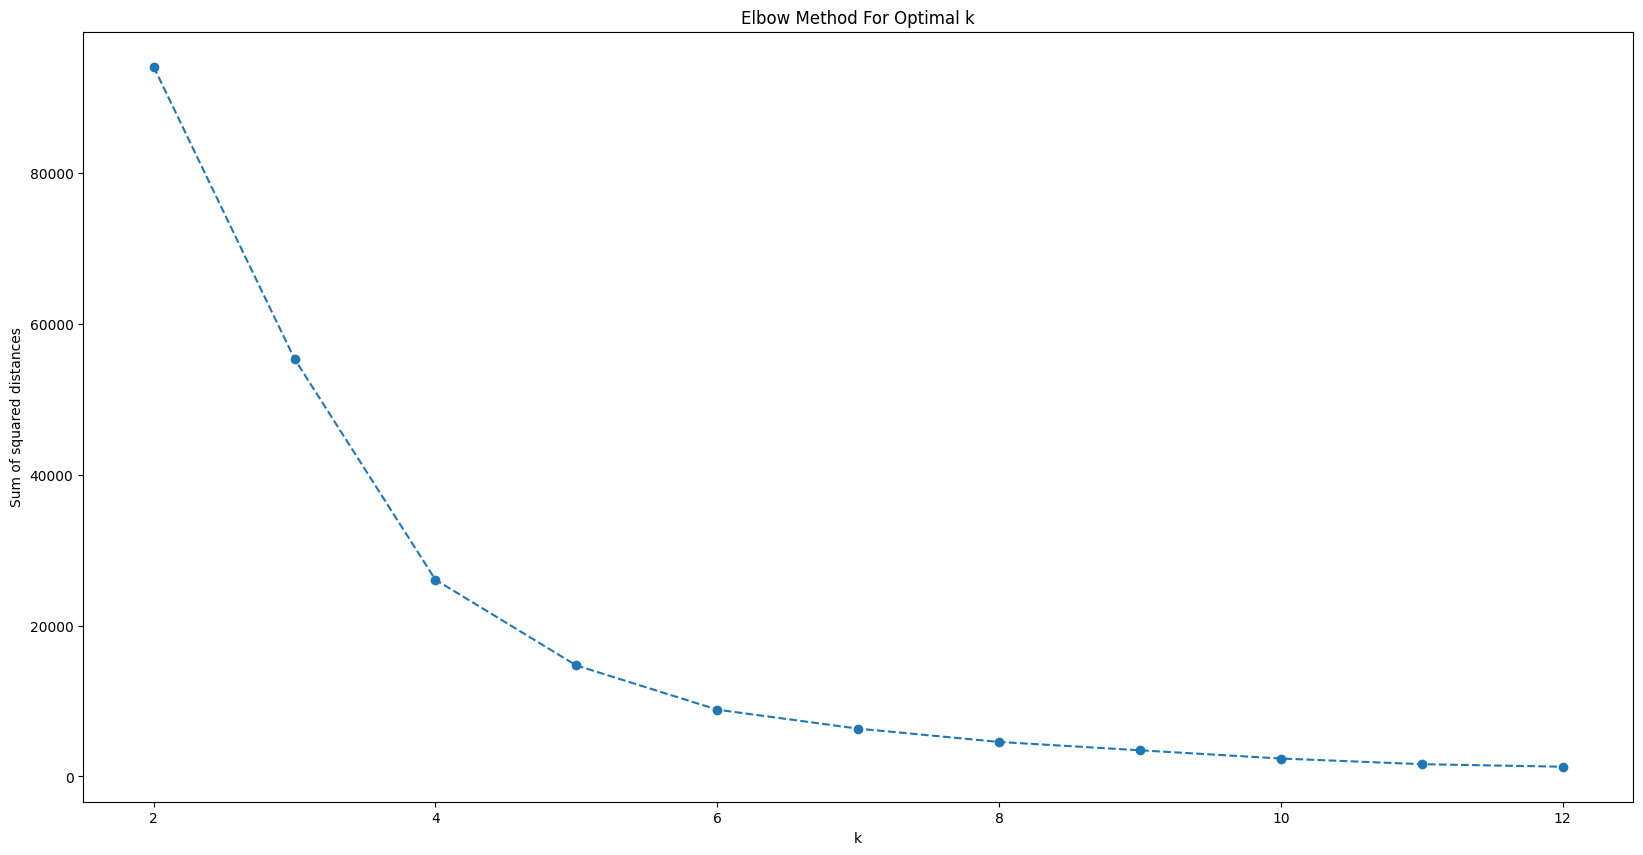

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(n_clusters, r_inertia_errors, 'o--')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k');

In [ ]:
model= KMeans(n_clusters=5,random_state=42)
df_customer["RecencyCluster"] = model.fit_predict(X_r)

In [ ]:
df_customer.head()

,CustomerID,Recency,RecencyCluster
0,660,14,1
1,666,2,1
2,716,6,1
3,109,4,1
4,57,12,1


In [ ]:
df_customer.groupby("RecencyCluster")["Recency"].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,7.0,135.142857,25.340538,105.0,118.0,133.0,149.5,173.0
1,223.0,5.309417,4.207271,0.0,2.0,5.0,9.0,14.0
2,18.0,56.777778,15.528174,41.0,46.0,50.5,68.5,93.0
3,1.0,317.000000,NaN,317.0,317.0,317.0,317.0,317.0
4,72.0,22.750000,6.328451,15.0,18.0,22.0,25.0,39.0


<ipython-input-39-1949a6320cf5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer['Recency'], bins=30)


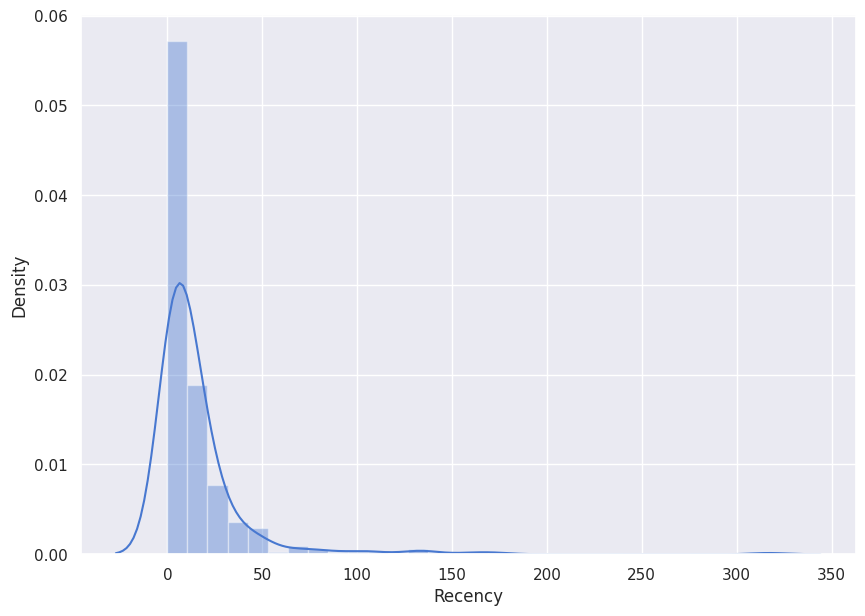

In [ ]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df_customer['Recency'], bins=30)
plt.show();

In [ ]:
#We will assign the recency number. Because the recency cluster are ramdomly assigned, we will assign it decendingly based on the mean
#The larger the mean, the less recency values
def order_cluster(cluster_col,col,df,ascending):
    new_cluster_col = "new" + cluster_col
    df_new = df.groupby(cluster_col)[col].mean().reset_index()
    df_new = df_new.sort_values(by=col,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_col,'index']], on=cluster_col)
    df_final = df_final.drop([cluster_col],axis=1)
    df_final = df_final.rename(columns={"index":cluster_col})
    return df_final

df_customer = order_cluster("RecencyCluster","Recency",df_customer,False)

In [ ]:
df_customer.groupby("RecencyCluster")["Recency"].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1.0,317.000000,NaN,317.0,317.0,317.0,317.0,317.0
1,7.0,135.142857,25.340538,105.0,118.0,133.0,149.5,173.0
2,18.0,56.777778,15.528174,41.0,46.0,50.5,68.5,93.0
3,72.0,22.750000,6.328451,15.0,18.0,22.0,25.0,39.0
4,223.0,5.309417,4.207271,0.0,2.0,5.0,9.0,14.0


In [ ]:
df_customer_freq= pd.DataFrame(df_all_Ger.groupby("CustomerID")["OrderID"].count().reset_index())
df_customer_freq.columns = ["CustomerID","Frequency"]
df_customer_freq.head()

,CustomerID,Frequency
0,1,39
1,5,47
2,6,28
3,7,19
4,10,49


In [ ]:
df_customer = pd.merge(df_customer,df_customer_freq, on="CustomerID")
df_customer.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,660,14,4,33
1,666,2,4,43
2,716,6,4,59
3,109,4,4,49
4,57,12,4,45


In [ ]:
X_q = df_customer[["Frequency"]]
n_clusters = range(2,13)
q_inertia_errors = []
q_silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model= KMeans(n_clusters=k,random_state=42)
    #train model
    model.fit(X_q)
    #Calculate inertia
    q_inertia_errors.append(model.inertia_)
    #Calculate silhouettte score
    q_silhouette_scores.append(
        silhouette_score(X_q,model.labels_)
    )

print("Inertia:", q_inertia_errors[:3])
print()
print("Silhouette Scores:", q_silhouette_scores[:3])

Inertia: [23134.030759670655, 10665.849999999999, 6327.188136230102]

Silhouette Scores: [0.6063707075013821, 0.5731725768315872, 0.5538853634990589]


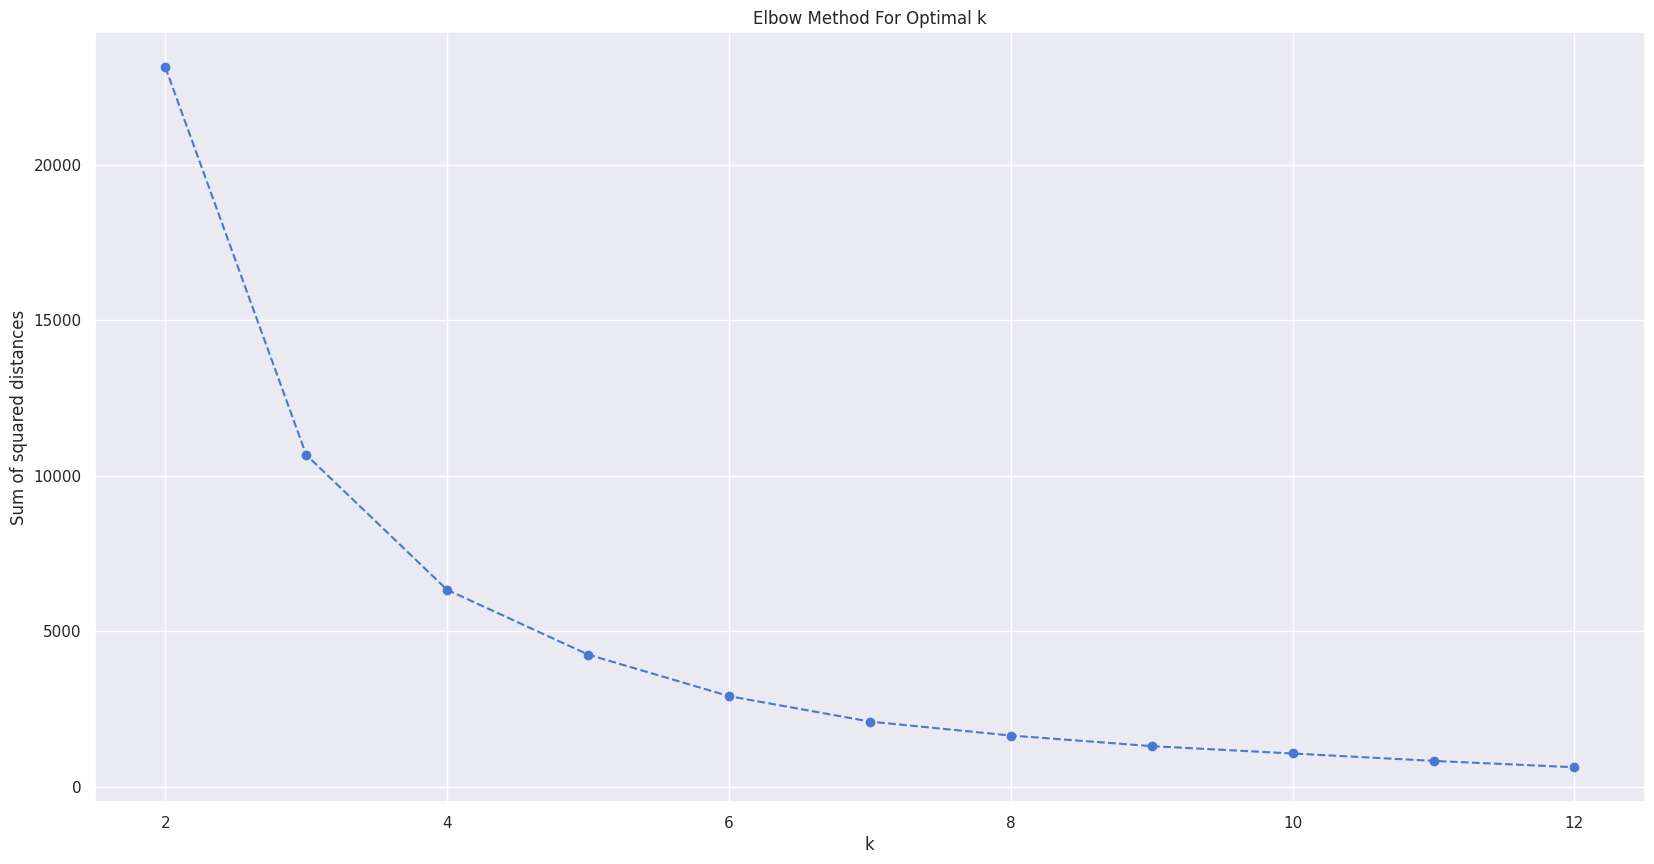

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(n_clusters, q_inertia_errors, 'o--')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k');

In [ ]:
model= KMeans(n_clusters=5,random_state=42)
df_customer["FrequencyCluster"] = model.fit_predict(X_q)

In [ ]:
df_customer.groupby("FrequencyCluster")["Frequency"].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,69.0,33.942029,3.157084,29.0,31.0,33.0,37.0,39.0
1,67.0,10.477612,4.171905,1.0,8.0,10.0,14.0,16.0
2,53.0,56.396226,4.452051,51.0,52.0,56.0,60.0,65.0
3,71.0,45.098592,3.230015,40.0,42.0,45.0,48.0,50.0
4,61.0,22.754098,3.309863,17.0,20.0,23.0,26.0,28.0


In [ ]:
df_customer = order_cluster("FrequencyCluster","Frequency",df_customer,True)

In [ ]:
df_customer.groupby("FrequencyCluster")["Frequency"].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,67.0,10.477612,4.171905,1.0,8.0,10.0,14.0,16.0
1,61.0,22.754098,3.309863,17.0,20.0,23.0,26.0,28.0
2,69.0,33.942029,3.157084,29.0,31.0,33.0,37.0,39.0
3,71.0,45.098592,3.230015,40.0,42.0,45.0,48.0,50.0
4,53.0,56.396226,4.452051,51.0,52.0,56.0,60.0,65.0


<ipython-input-50-f716a745345e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer['Frequency'], bins=30)


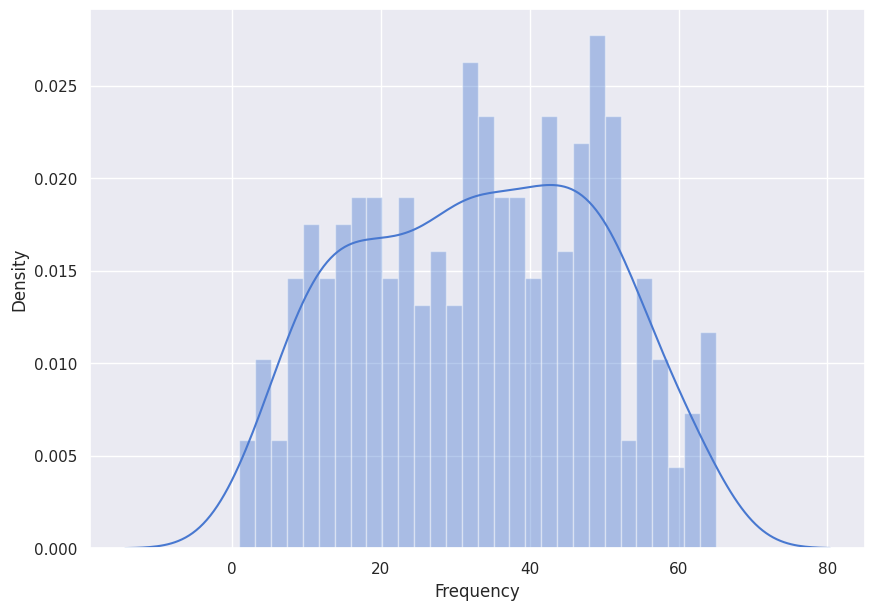

In [ ]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df_customer['Frequency'], bins=30)
plt.show()

In [ ]:
df_all_Ger["Revenue"] = df_all_Ger["SellPrice"]
df_customer_rev = pd.DataFrame(df_all_Ger.groupby("CustomerID")["Revenue"].sum().reset_index())
df_customer_rev.head()

<ipython-input-51-9f6f2ebd76b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_Ger["Revenue"] = df_all_Ger["SellPrice"]


,CustomerID,Revenue
0,1,34948
1,5,36913
2,6,26459
3,7,13925
4,10,41584


In [ ]:
df_customer = pd.merge(df_customer,df_customer_rev, on="CustomerID")
df_customer.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,660,14,4,33,2,26124
1,573,8,4,36,2,30013
2,150,13,4,29,2,25153
3,534,12,4,36,2,30999
4,328,0,4,29,2,22110


In [ ]:
X_re = df_customer[["Revenue"]]
n_clusters = range(2,13)
re_inertia_errors = []
re_silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model= KMeans(n_clusters=k,random_state=42)
    #train model
    model.fit(X_re)
    #Calculate inertia
    re_inertia_errors.append(model.inertia_)
    #Calculate silhouettte score
    re_silhouette_scores.append(
        silhouette_score(X_q,model.labels_)
    )

print("Inertia:", re_inertia_errors[:3])
print()
print("Silhouette Scores:", re_silhouette_scores[:3])

Inertia: [15795969559.04449, 7627327469.591799, 4545807892.677745]

Silhouette Scores: [0.15898906495516202, -0.02880940932517032, -0.10990028248850661]


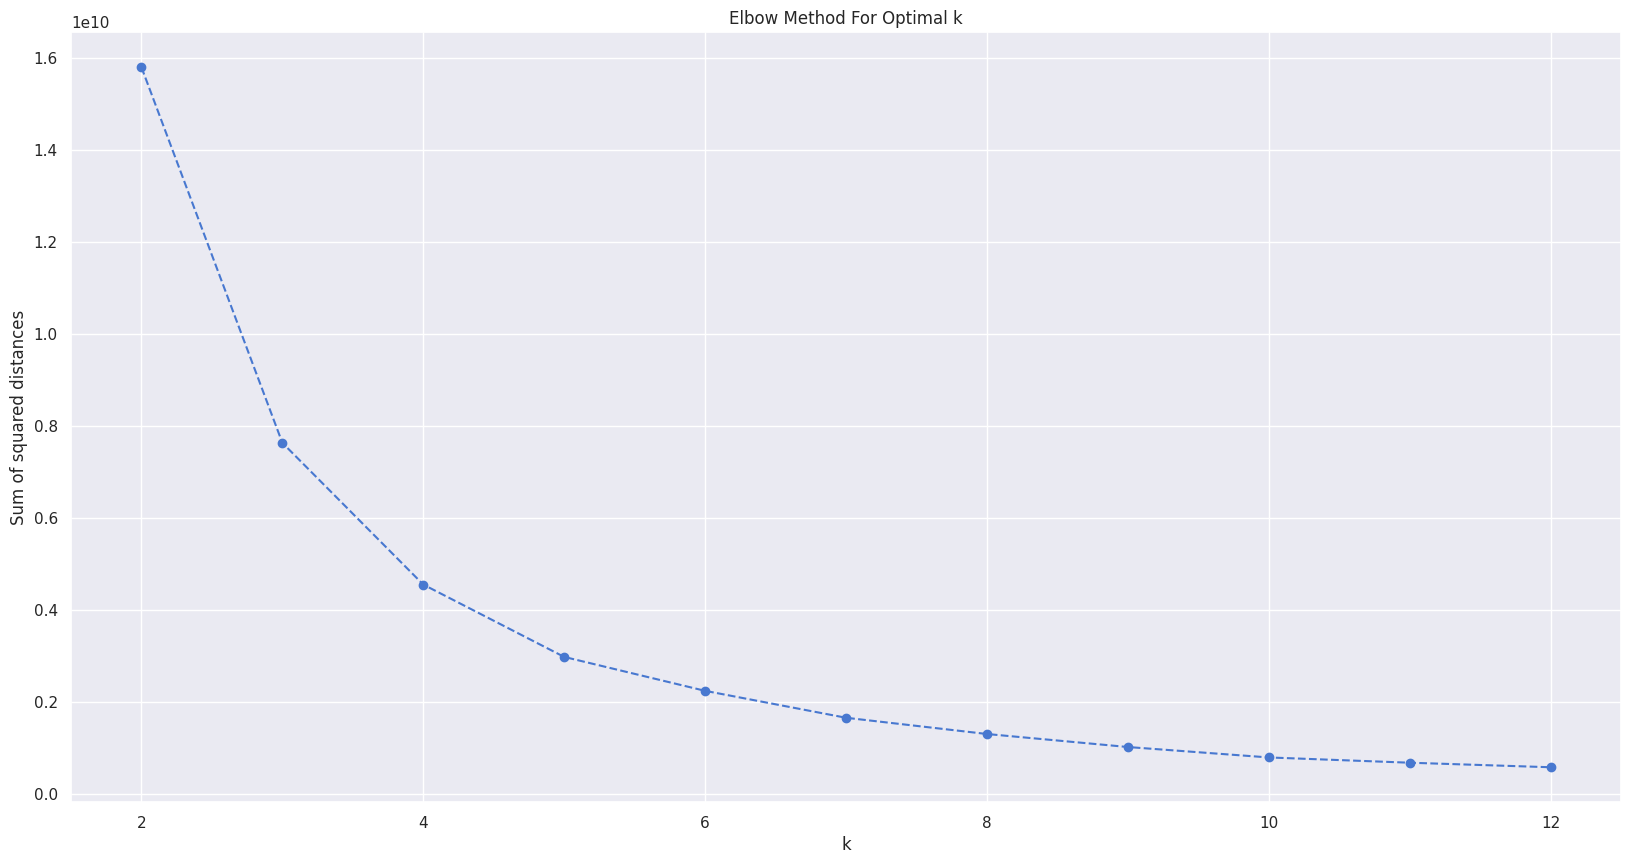

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(n_clusters, re_inertia_errors, 'o--')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k');

In [ ]:
model= KMeans(n_clusters=5,random_state=42)
df_customer["MonetaryCluster"] = model.fit_predict(X_re)

In [ ]:
df_customer = order_cluster("MonetaryCluster","Revenue",df_customer,True)

In [ ]:
df_customer.groupby("MonetaryCluster")["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,57.0,7643.789474,3027.976627,745.0,6144.00,8496.0,9781.0,12006.0
1,63.0,16693.857143,2803.985095,12188.0,14284.50,16388.0,19229.5,21392.0
2,72.0,26433.986111,2670.350921,21709.0,24356.75,26291.5,28554.0,30999.0
3,78.0,36375.717949,2565.096236,31479.0,34515.50,35990.0,38718.0,41154.0
4,51.0,46509.980392,4378.588451,41450.0,42941.00,45800.0,47930.5,62539.0


<ipython-input-58-06bc812ea384>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customer['Revenue'], bins=30)


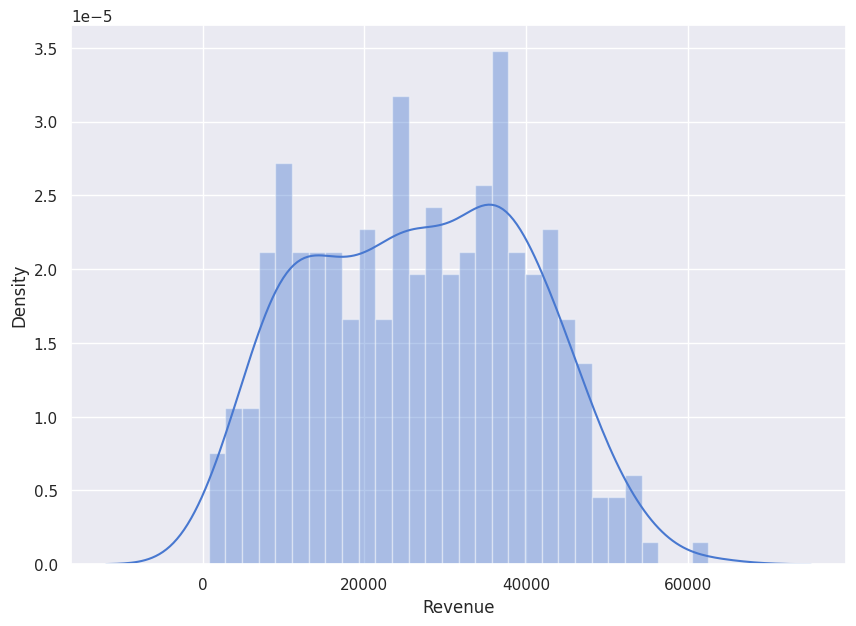

In [ ]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(df_customer['Revenue'], bins=30)
plt.show()

In [ ]:
df_customer["OverallScore"] = df_customer["RecencyCluster"] + df_customer["FrequencyCluster"] + df_customer["MonetaryCluster"]
df_customer.groupby("OverallScore")[["Recency","Frequency","Revenue"]].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,317.000000,1.000000,745.000000
1,135.142857,5.142857,4398.142857
2,55.769231,7.538462,6322.615385
3,25.571429,11.476190,9429.142857
4,16.565217,13.434783,10305.739130
5,21.227273,20.000000,16438.318182
6,7.088235,22.823529,17897.647059
7,16.680000,31.600000,25675.120000
8,6.644444,33.511111,26779.066667


So after segmentation, the cluster model divide customers from Germany into 12 segments as Over all score from 1-12 groups one outlier score 0 based on their RFM characteristics.

This allows companies to target specific clusters of customers with greater relevance for their particular behavior – thereby generating higher response rates, increased loyalty, and better customer lifetime value.

# Cohart Analysis

 A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts.

* Types of cohorts:
  * Time Cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
  * Behavior cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
  * Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

For cohort analysis, there are a few labels that we have to create:

* Transaction period - A string representation of the year and month of a single transaction.
* Cohort group:- A string representation of the the year and month of a customer’s first purchase. This label is common across all transactions for a particular customer.
* Cohort period/Index-  A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase.

In [ ]:
def get_month(x):
  return dt.datetime(x.year,x.month,1)
df3['TransacMonth'] = df3['TransactionDate'].apply(get_month)
grouping = df3.groupby('CustomerID')['TransacMonth']
df3['CohortMonth'] = grouping.transform('min')
df3.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,TransacMonth,CohortMonth
0,0,0,352,2020-03-21,In Store,2020-03-01,2020-01-01
1,0,0,3433,2020-07-14,In Store,2020-07-01,2020-01-01
2,0,0,11162,2020-08-09,In Store,2020-08-01,2020-01-01
3,0,0,13011,2020-12-07,In Store,2020-12-01,2020-01-01
4,0,0,13885,2020-11-08,In Store,2020-11-01,2020-01-01


In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day

invoice_year,invoice_month,_ = get_month_int(df3,'TransacMonth')
cohort_year,cohort_month,_ = get_month_int(df3,'CohortMonth')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df3['CohortIndex'] = year_diff * 12 + month_diff + 1

In [ ]:
#Count monthly active customers from each cohort
grouping = df3.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2020-01-01,656.0,591.0,590.0,595.0,600.0,586.0,591.0,587.0,591.0,591.0,593.0,597.0
2020-02-01,75.0,52.0,54.0,50.0,54.0,53.0,60.0,55.0,53.0,51.0,55.0,NaN
2020-03-01,23.0,13.0,17.0,14.0,15.0,14.0,17.0,16.0,17.0,15.0,NaN,NaN
2020-04-01,5.0,2.0,1.0,3.0,3.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
2020-05-01,3.0,NaN,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2020-06-01,5.0,2.0,3.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,2.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
retention.round(3) * 100 #to show the number as percentage

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2020-01-01,100.0,90.1,89.9,90.7,91.5,89.3,90.1,89.5,90.1,90.1,90.4,91.0
2020-02-01,100.0,69.3,72.0,66.7,72.0,70.7,80.0,73.3,70.7,68.0,73.3,NaN
2020-03-01,100.0,56.5,73.9,60.9,65.2,60.9,73.9,69.6,73.9,65.2,NaN,NaN
2020-04-01,100.0,40.0,20.0,60.0,60.0,80.0,60.0,40.0,80.0,NaN,NaN,NaN
2020-05-01,100.0,NaN,33.3,66.7,33.3,NaN,33.3,33.3,NaN,NaN,NaN,NaN
2020-06-01,100.0,40.0,60.0,60.0,20.0,20.0,40.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.0,NaN,100.0,50.0,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


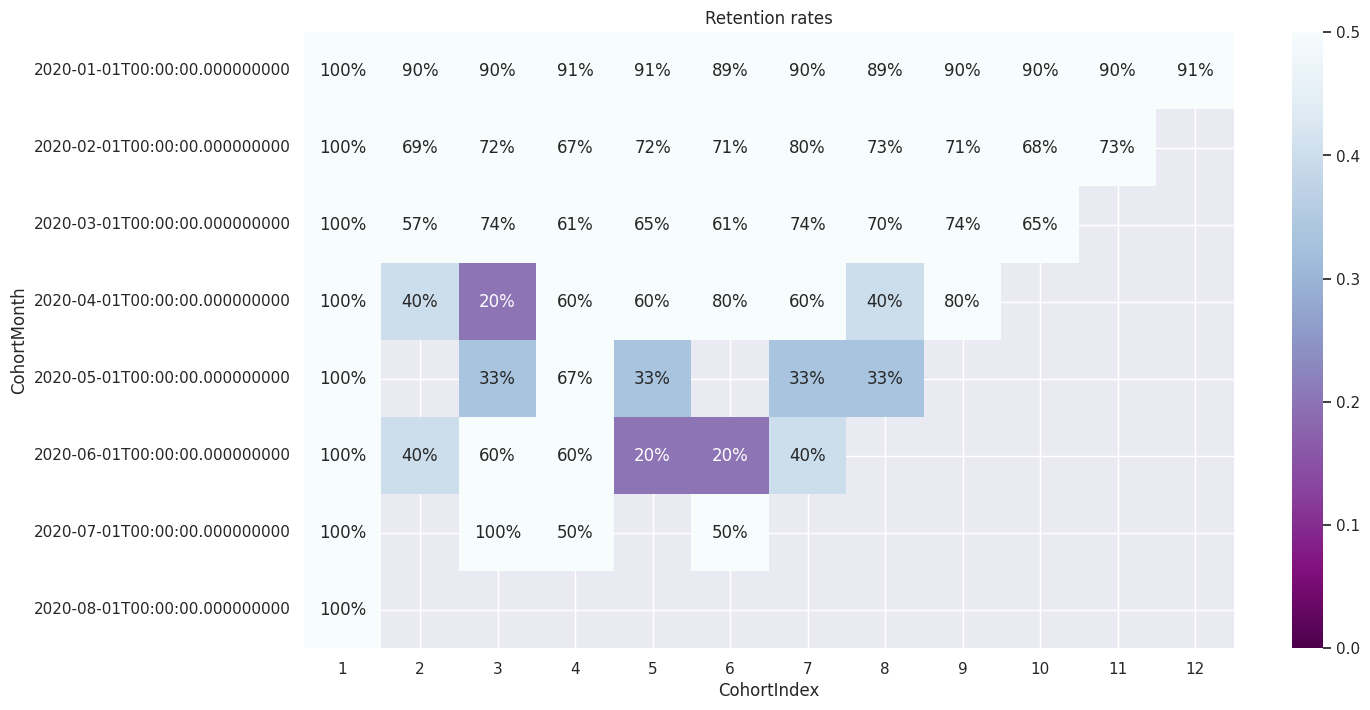

In [ ]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

The result is interesting. Customers who have purchased in January have very high retention rate then drop significantly the next few month until August then there is no new customers.

Further investigate should be executed to gain more knowledge on why this happened. My guess is that because of COVID19 where store were forced to be shut down, limit approach to new customers.